In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('/home/rohan/Documents/JupyterProjects/FINAL-TF2-FILES/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.corr()['benign_0__mal_1'].sort_values(ascending = False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


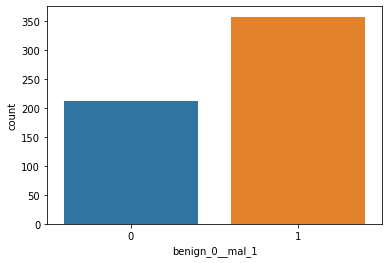

In [7]:
sns.countplot(df['benign_0__mal_1'])

In [8]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.3))


model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [43]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 25)


model.fit(X_train, y_train, 
          epochs = 600,
          validation_data = (X_test, y_test),
          callbacks = [early_stop]
         )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6789 - val_loss: 0.6474
Epoch 2/600
426/426 [==============================] - 0s 175us/sample - loss: 0.6495 - val_loss: 0.6205
Epoch 3/600
426/426 [==============================] - 0s 185us/sample - loss: 0.6288 - val_loss: 0.5934
Epoch 4/600
426/426 [==============================] - 0s 164us/sample - loss: 0.5964 - val_loss: 0.5639
Epoch 5/600
426/426 [==============================] - 0s 173us/sample - loss: 0.5705 - val_loss: 0.5319
Epoch 6/600
426/426 [==============================] - 0s 165us/sample - loss: 0.5577 - val_loss: 0.5018
Epoch 7/600
426/426 [==============================] - 0s 159us/sample - loss: 0.5323 - val_loss: 0.4704
Epoch 8/600
426/426 [==============================] - 0s 163us/sample - loss: 0.4990 - val_loss: 0.4359
Epoch 9/600
426/426 [==============================] - 0s 160us/sample - loss: 0.4710 - val_loss: 0.4042
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0859 - val_loss: 0.0958
Epoch 79/600
426/426 [==============================] - 0s 170us/sample - loss: 0.1030 - val_loss: 0.1053
Epoch 80/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0756 - val_loss: 0.0879
Epoch 81/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0792 - val_loss: 0.0960
Epoch 82/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0644 - val_loss: 0.0902
Epoch 83/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0899 - val_loss: 0.0959
Epoch 84/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0745 - val_loss: 0.0952
Epoch 85/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0631 - val_loss: 0.0906
Epoch 86/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0805 - val_loss: 0.1016
Epoch 87/600
426/426 [========================

<Figure size 720x576 with 0 Axes>

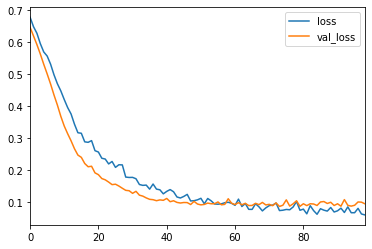

In [44]:
plt.figure(figsize = (10,8))

pd.DataFrame(model.history.history).plot()


In [45]:
pred = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
confusion_matrix(y_test, pred)

array([[54,  1],
       [ 3, 85]])

In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

